In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn import preprocessing

## KNN REGGRESSOR TO PREDICT CAR PRICES 

We are going to train a KNN Regression model that predicts
the prices of cars by using the other features in the dataset.

### a) Training Vs Validation Plot:

Split training dataset (train_x_e and train_y) into a validation and new training set ( 80% training and 20% validation , use random_state = 0 with sklearn’s train_test_split).

For every integer value k between 1 and 30 create and record a KNN Regression model’s training and validation MSEs where the KNN model’s number of neighbours is k. 

Produce a plot that visualizes both your training and validation errors over the differing values of k: where the y-axis is the error and the x-axis is k.

In [133]:
#data train
train_x_a = pd.read_csv("training.csv")
train_y = pd.read_csv("training.csv")["price"]
nan_columns = train_x_a.columns[train_x_a.isna().any()].tolist()
train_x_a=train_x_a.dropna(subset=['price'])
train_y=train_y.dropna()
train_x_b = train_x_a.fillna(train_x_a.median())
dt = train_x_a.dtypes.to_dict()
categorical_columns = [col for col,typ in dt.items() if typ=="O"]
train_x_d = pd.get_dummies(train_x_b)
sd = StandardScaler().fit(train_x_d.values).transform(train_x_d.values)
train_x_e = pd.DataFrame(sd, index=train_x_d.index, columns=train_x_d.columns)

#data test

test_x = pd.read_csv("test.csv").dropna(subset=['price']).fillna(train_x_a.median())
test_y = pd.read_csv("test.csv")['price']
test_y=test_y.dropna()

test_x = pd.get_dummies(test_x)
sd = StandardScaler().fit(test_x.values).transform(test_x.values)
test_x = pd.DataFrame(sd, index=test_x.index, columns=test_x.columns)
train_split_x, val_split_x, train_split_y, val_split_y = train_test_split(train_x_e, train_y, test_size=0.2, random_state=0)

knn_training_errors = []
knn_validation_error = []
k_value = []

#changing as types int
train_split_x = train_split_x.astype(int)
train_split_y = train_split_y.astype(int)

val_split_x = val_split_x.astype(int)
val_split_y = val_split_y.astype(int)


    

In [134]:

from sklearn.metrics import accuracy_score 
# 1,2,3.....30
k_range=range(1,31) 
knn_training_errors = []
knn_validation_errors = []
knn_accuracy=[] # for selecting best knn

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k).fit(train_split_x,train_split_y)
    mse = mean_squared_error(train_split_y, knn.predict(train_split_x))
    
    knn_val = KNeighborsClassifier(n_neighbors = k).fit(val_split_x,val_split_y)
    mse_val = mean_squared_error(val_split_y, knn.predict(val_split_x))
    
    knn_training_errors.append(mse)
    knn_validation_errors.append(mse_val)
    
    knn_accuracy.append(accuracy_score(train_split_y, knn.predict(train_split_x)))


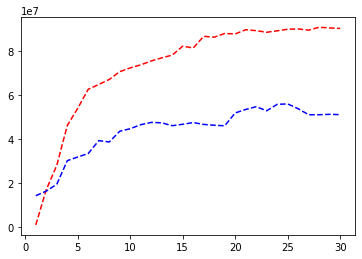

In [135]:
# training vs validation plot
import matplotlib.pyplot as plt
#train error red , val error blue
plt.plot(k_range,knn_training_errors, 'r--',  k_range, knn_validation_errors,'b--')
plt.show()

### b) Test your model:

For the best k , re-create best model as best_knn and report it’s test MSE on the test set.

In [136]:
min_train=knn_accuracy.index(max(knn_accuracy))
print(min_train) #we use index so our value should be 0+1 =1 
best_knn = KNeighborsClassifier(n_neighbors=1).fit(train_x_e.astype(int), train_y.astype(int))

0


In [137]:
knn_preds = best_knn.predict(test_x) #prediction

In [138]:
knn_mse = mean_squared_error(test_y, knn_preds) #mse
print(knn_mse)

38916456.15625


## DECISION TREE REGRESSOR TO PREDICT CAR PRICES

Train a Decision Tree Regression model that predicts the prices of cars by using the other features in the dataset. 

When asked to retrieve the MSE score from GridSearchCV, set the scoring option to ‘neg_mean_square_error’. This will return a negative error. 

To obtain MSE, get the absolute value.

### c) Grid Search to find best model:

As decision trees have large hyper parameter sets, we will be using gridsearch to find the best combinations. Using the below parameters, run GridSearchCV (cv = 5) with a Decision Tree model on train_x_e and train_y. 

Print out the best model’s parameters and error. Set random_state to 0.!![Screenshot_1](https://user-images.githubusercontent.com/43733194/76402669-cc2c8200-6394-11ea-8f02-4f2e410f348f.png)


In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import SCORERS
#decision tree regressor
model_dt=DecisionTreeRegressor(random_state=0)
params = [{'max_depth':[None, 1, 5, 10], 'min_samples_split':[0.01, 0.05, 0.1, 0.3],
          'max_features': ['auto', 'sqrt', 'log2'], 'max_leaf_nodes':[10, 50, 100, 250]}]
#gridsearch cv
decision_tree_grid = GridSearchCV(model_dt, param_grid = params, cv=5, scoring = 'neg_mean_squared_error')

In [140]:
#fitting
decision_tree_grid.fit(train_x_e.astype(float), train_y.astype(float))

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [None, 1, 5, 10],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'max_leaf_nodes': [10, 50, 100, 250],
              

### d) Test your model:

Recreate best Decision Tree model from (c) as best_tree and report it’s test MSE on the test set.

In [141]:
#finding best parameters
best_params = decision_tree_grid.best_params_
best_params

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 50,
 'min_samples_split': 0.01}

In [142]:
#dtr with best parameters
best_tree=DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=50,min_samples_split=0.01)
best_tree.fit(train_x_e.astype(float), train_y.astype(float))


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=50,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=0.01,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [143]:
tree_preds =best_tree.predict(test_x)

In [144]:
tree_mse = mean_squared_error(test_y,tree_preds)
print(tree_mse)

9010526.495798063


## ENSEMBLE BAGGING REGRESSOR TO PREDICT CAR PRICES

Train a bagging ensemble model that predicts the prices of cars by using the other features in the dataset. When asked to retrieve the MSE score from GridSearchCV, set the scoring option to ‘neg_mean_square_error’. This will
return a negative error. To obtain MSE, get the absolute value.

### e) Grid Search to find best model:

Using the below parameters, run GridSearchCV (cv = 5) on train_x_e and train_y. Print out the best model’s parameters and error. Set random_state to 0.
![Screenshot_2](https://user-images.githubusercontent.com/43733194/76402764-e9615080-6394-11ea-831e-9d0d4a750572.png)

In [145]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#bagging 
model_bag = BaggingRegressor(random_state=0)
params=[{'base_estimator':[LinearRegression(),KNeighborsRegressor(), DecisionTreeRegressor(random_state=0)], 'n_estimators':[25, 50, 100, 250],'bootstrap_features': [False, True], 'random_state':[0]}]
bag_grid = GridSearchCV(model_bag, param_grid = params, cv=5, scoring = 'neg_mean_squared_error')

In [146]:
bag_grid.fit(train_x_e.astype(float), train_y.astype(float))

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'base_estimator': [LinearRegression(copy_X=True,
                                                              fit_intercept=True,
                                                              n...
                                                                   min_impurity_decrease=0.0,
                                                                   min_impurity_split=None,
                                                                   min_samples_

### f) Test your model:

Recreatation best Ensemble Bagging model from (e) as best_bag and report it’s test MSE on the test set.

In [153]:
#best parameters for bagging
best_bag = bag_grid.best_params_
best_bag

{'base_estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'bootstrap_features': False,
 'n_estimators': 25,
 'random_state': 0}

In [154]:
bag= BaggingRegressor(base_estimator= LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), bootstrap_features= False,n_estimators= 25,random_state= 0)
bag.fit(train_x_e.astype(float), train_y.astype(float))

BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                 fit_intercept=True,
                                                 n_jobs=None, normalize=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=25, n_jobs=None, oob_score=False,
                 random_state=0, verbose=0, warm_start=False)

In [156]:
bag_preds=bag.predict(test_x)

In [158]:
bag_mse = mean_squared_error(test_y,bag_preds)
print(bag_mse)

7765432.069576001


## RANDOM FOREST REGRESSOR TO PREDICT CAR PRICES

Train a random forest model that predicts the prices of cars by using the other features in the dataset. When asked to retrieve the MSE score from GridSearchCV, set the scoring option to ‘neg_mean_square_error’. This will return a negative error. To obtain MSE, get the absolute value.

### g) Grid Search to find best model:

Using the below parameters, run GridSearchCV (cv = 5) with a Random Forest model on train_x_e and train_y. 
Print out the best model’s parameters and error. Make sure you set random_state to 0.
![Screenshot_3](https://user-images.githubusercontent.com/43733194/76402801-faaa5d00-6394-11ea-853e-8b94652b99df.png)

In [159]:
from sklearn.ensemble import RandomForestRegressor
#random forest regressor
model_rf = RandomForestRegressor(random_state=0)
params=[{'n_estimators':[25, 50, 100, 250],'max_depth':[None, 1, 5, 10],'random_state':[0]}]
random_forest_grid = GridSearchCV(model_rf, param_grid = params, cv=5, scoring = 'neg_mean_squared_error')

In [160]:
random_forest_grid.fit(train_x_e.astype(float), train_y.astype(float))

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

### h) Test your model:

Recreation best Random Forest model from (g) as best_rf and report it’s test MSE on the test set.

In [168]:
#best parameters for random forest and implementation and testing
best_random_forest =random_forest_grid.best_params_
best_random_forest

{'max_depth': 10, 'n_estimators': 25, 'random_state': 0}

In [169]:
random_forest= RandomForestRegressor(max_depth=10,n_estimators=25,random_state=0)
random_forest.fit(train_x_e.astype(float), train_y.astype(float))
random_forest_preds = random_forest.predict(test_x)

In [170]:
random_forest_mse = mean_squared_error(test_y,random_forest_preds)
print(random_forest_mse)

9886772.891106403


### i) Feature Importances:

Print out the three most important features according to  best model.

In [219]:
#columns name list
cols=list(train_x_e.columns.values)

#with heapq library find best 3 feature with using feature_importances func
import heapq
top_3_rf_features=heapq.nlargest(3, zip(random_forest.feature_importances_,cols))
print(top_3_rf_features)


[(0.9183958498486164, 'price'), (0.0436928363341638, 'enginesize'), (0.02821626915417207, 'horsepower')]
